<a href="https://colab.research.google.com/github/Seeethy/The-Martingale-betting-system/blob/main/Martingale_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

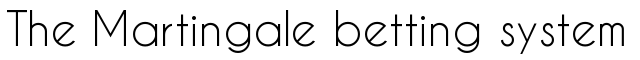

**A martingale betting strategy** was found in 18-century. Its still very popular nowadays among people who make bets. This strategy was at first designed for a simple "toss a coin" game. If a flipped coin came up as heads - player wins, if it comes as tails - player losses. 

**This strategy has got 3 key ideas:**

  1) Player starts with a certain bet
 
  2) Player is multiplying next bet by 2 after every loss.

  3) If a player wins he resets the value of the next bet.

Lets check that strategy in practise by making an experiment. A player will start playing with 100 dolars by betting 1 dolar per game. In reality, if a player plays for example a roulette - he has less winning chance than 50% (48.60% - european roulette, 47.4% - american roulette). Cassinos also usually restrict how many games you can play at a certain table and the maximal bet which you can make. For this experiment we will ignore this and make a simulation of a a random game which seems to be ideal for a player. Lets see what happens...

In [ ]:
import random
import matplotlib.pyplot as plt
import math as m
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker
import numpy as np

def game():
  coin = ['heads', 'tails']
  result = random.choice(coin)
  if result == 'heads':
    game_status = 'win'
  if result == 'tails':
    game_status = 'loss'
  return game_status

deposit = 100
starting_deposit = deposit
bet = 1
bet_list = []
deposit_list = []
game_counter = 0
game_counter_list = []
bet_list.append(bet)
deposit_list.append(deposit)
game_counter_list.append(game_counter)


while game_counter <= 1000000:
  #print(deposit - bet)
  deposit = deposit - bet 
  game_output = game()

  if game_output == 'win':
    #print('win')
    deposit += bet*2
    bet = 2
    #print("deposit after win",deposit)

  if game_output == 'loss':
    #print('loss')
    #print("deposit after loss",deposit)
    bet = bet * 2
    #if bet > 1000:
     #bet = 1000
  
  bet_list.append(bet)
  deposit_list.append(deposit)
  game_counter +=1
  game_counter_list.append(game_counter)
  if deposit <=0:
    break

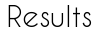

As you can see in graph below - its impossible in long term not to lose money. 
Every simulation will get the same effect, the question is - when will the series of losses happen? 

The idea of Martingale system may seem intresing at first glance, but in real world its really dangerous to follow this idea. 

This is why:
  
  1) Player with an infinite amount of money does not exist.

  2) If a player gets a series of X loses, the next loss probability is still 50%.

  3) On a certain point bet value will be higher than deposit value if we will keep lossing

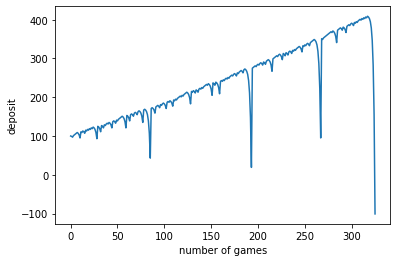

In [ ]:
plt.plot(game_counter_list, deposit_list)
plt.xlabel("number of games")
plt.ylabel("deposit")
plt.show()

In [ ]:
print("last deposit values: ",deposit_list[-10:])
print("last bet values: ", bet_list[-10:])

last deposit values:  [405, 409, 407, 403, 395, 379, 347, 283, 155, -101]
last bet values:  [4, 2, 4, 8, 16, 32, 64, 128, 256, 512]


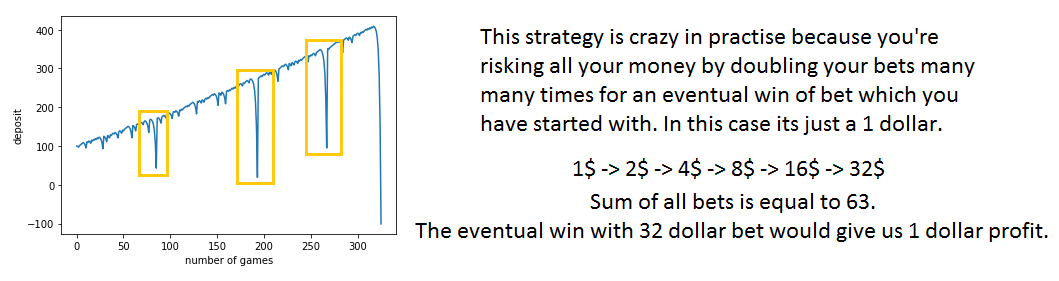

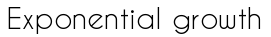

Bets grow exponentially and that is the main problem for a player with a limited budget. 


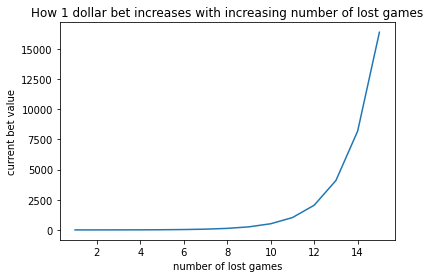

In [ ]:
y_pyplot = []
for n in range(0,15,1):
  y_pyplot.append(2**n)

x_pyplot = np.arange(1,16)
fig, ax = plt.subplots()
ax.yaxis.set_ticks(np.arange(0, 1000000,2500))

plt.plot(x_pyplot,y_pyplot)
plt.title("How 1 dollar bet increases with increasing number of lost games")
plt.xlabel("number of lost games")
plt.ylabel("current bet value")
plt.show()

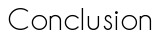

A martingale betting system works fine only in theory. Using this strategy may very likely destroy deposit that you play with. People tend to underestimate odds that something with a low probability will happen.
Chances that flipped coin will show the same side 6 or more times in a row is much more likely to happen, than many of us belive. If some action has any chance of occuring, then it will happen (in the long run obviously).